# Etapa de Transferencia - Proyecto Final <br>
Fundación Universitaria UCompensar<br>
Programación para Ciencia de Datos II<br>
Laura Milena Jiménez Torres<br>
Septiembre 28, 2025

## Resumen

El presente proyecto busca analizar la relación entre la duración de las canciones y su precio en el catálogo que ofrece la base de datos Chinook; con anterioridad, se aplicaron métodos de estadística descriptiva, regresión lineal, contraste de hipótesis y modelos predictivos.

Los resultados muestran que, aunque algunas métricas como el coeficiente de determinación (R²) son altas, esto se debe a la baja variabilidad del precio, que está fijado bien sea en 0.99 o en 1.99 USD.

En conclusión, el precio no depende de la duración ni de características técnicas de las canciones, sino de una política fija del negocio. El dashboard desarrollado permitirá visualizar de manera interactiva los hallazgos principales.


## Introducción

Con este proyecto se pretende evaluar si existe relación entre la duración de las canciones y el precio de venta en el catálogo digital Chinook.

Para lograrlo se implementaron técnicas de estadística descriptiva, con el fin de comprender la distribución de los datos. Contrastes de hipótesis, incluyendo correlación de Pearson. Modelos predictivos como regresión lineal simple, regresión múltiple y regresión logística.

La importancia de este análisis radica en validar si los precios responden a criterios técnicos como duración o tamaño de archivo, o si son producto de una política comercial predefinida.


## Datos y Procesamiento

Para el presente proyecto se utilizó la base de datos Chinook, que se encuentra en Kaggle.

Se cargaron las tablas relevantes, principalmente Track, que contiene información sobre las pistas musicales:

Milliseconds, hace referencia a la duración en milisegundos.
Bytes, hace referencia a del archivo.
UnitPrice hace referencia al precio de cada canción.

A continuación se importan las librerías necesarias y se carga el dataset.


In [5]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix

# Cargar dataset a usar
df = pd.read_csv("Track.csv")

# Vista preliminar
df.head()


,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,NaN,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99


### Procesamiento de Datos

Selección de columnas relevantes, se trabajó con Milliseconds, Bytes y UnitPrice.<br><br>
Tratamiento de valores nulos, se eliminaron registros con valores faltantes en las variables seleccionadas.<br><br>
Creación de variable derivada, se calculó la duración en minutos (`Duration_min = Milliseconds/60000`).<br><br>
Variable binaria, se generó la columna HighPrice para identificar canciones con precio mayor a 1 USD, para la regresión logística.


In [6]:
# Limpieza y transformación
df = df.dropna(subset=["Milliseconds","UnitPrice"]).reset_index(drop=True)
df["Duration_min"] = df["Milliseconds"] / 60000
df["HighPrice"] = (df["UnitPrice"] > 1).astype(int)

df[["Name","Duration_min","UnitPrice","HighPrice"]].head(10)

,Name,Duration_min,UnitPrice,HighPrice
0,For Those About To Rock (We Salute You),5.728650,0.99,0
1,Balls to the Wall,5.709367,0.99,0
2,Fast As a Shark,3.843650,0.99,0
3,Restless and Wild,4.200850,0.99,0
4,Princess of the Dawn,6.256967,0.99,0
5,Put The Finger On You,3.427700,0.99,0
6,Let's Get It Up,3.898767,0.99,0
7,Inject The Venom,3.513900,0.99,0
8,Snowballed,3.385033,0.99,0
9,Evil Walks,4.391617,0.99,0


## Estadística Descriptiva

Se calcularon medidas de tendencia central y dispersión tanto para la duración de las canciones como para su precio. <br>
Estas medidas permiten identificar el comportamiento general de las variables antes de aplicar modelos más complejos.


In [7]:
# Extraer variables
dur = df["Milliseconds"].values
price = df["UnitPrice"].values

print("Duración (ms):")
print("Media:", np.mean(dur))
print("Mediana:", np.median(dur))
print("Desviación estándar:", np.std(dur, ddof=1))

print("\nPrecio (USD):")
print("Media:", np.mean(price))
print("Mediana:", np.median(price))
print("Desviación estándar:", np.std(price, ddof=1))


Duración (ms):
Media: 393599.2121039109
Mediana: 255634.0
Desviación estándar: 535005.4352066235

Precio (USD):
Media: 1.0508050242649158
Mediana: 0.99
Desviación estándar: 0.2390064444263366


## Visualizaciones

Se realizaron dos visualizaciones principales:

1. Histograma de la duración, muestra la distribución de las canciones en minutos.<br><br>
2. Diagrama de dispersión duración vs precio, permite observar si existe alguna relación visual entre ambas variables.


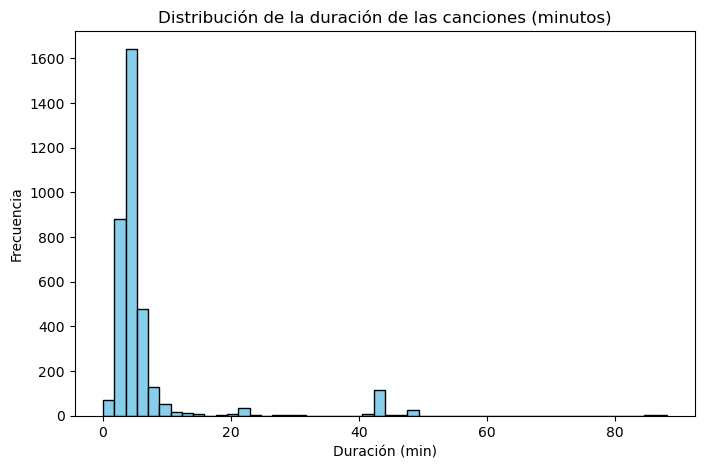

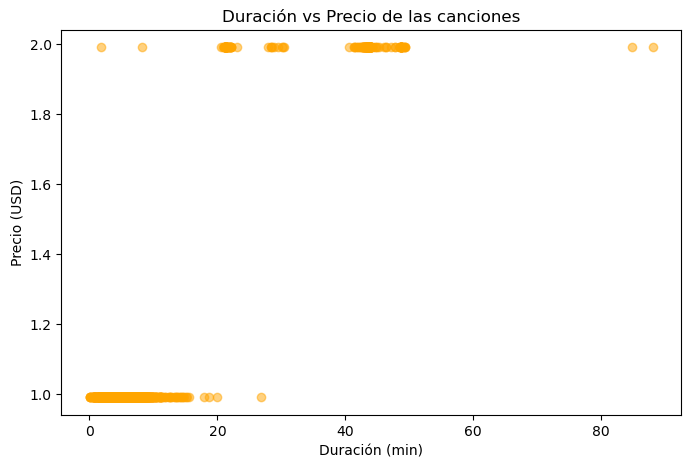

In [8]:
# Histograma de duración en minutos
plt.figure(figsize=(8,5))
plt.hist(df["Duration_min"], bins=50, edgecolor="black", color="skyblue")
plt.title("Distribución de la duración de las canciones (minutos)")
plt.xlabel("Duración (min)")
plt.ylabel("Frecuencia")
plt.show()

# Scatter duración vs precio
plt.figure(figsize=(8,5))
plt.scatter(df["Duration_min"], df["UnitPrice"], alpha=0.5, color="orange")
plt.title("Duración vs Precio de las canciones")
plt.xlabel("Duración (min)")
plt.ylabel("Precio (USD)")
plt.show()


## Contraste de Hipótesis

Se plantea la siguiente hipótesis:

H₀ (nula): No existe relación significativa entre la duración y el precio de las canciones.<br>
H₁ (alternativa):Sí existe relación significativa entre la duración y el precio de las canciones.<br><br> 

Para comprobarlo se aplicó la correlación de Pearson.


In [9]:
r, pval = stats.pearsonr(df["Milliseconds"], df["UnitPrice"])
print("Coeficiente de correlación (r):", r)
print("p-valor:", pval)

Coeficiente de correlación (r): 0.9317964749112739
p-valor: 0.0


## Regresión Lineal Simple

Se evaluó la relación entre la duración (en milisegundos) y el precio.<br>
Se ajustó un modelo de regresión lineal para observar si existe una pendiente significativa.


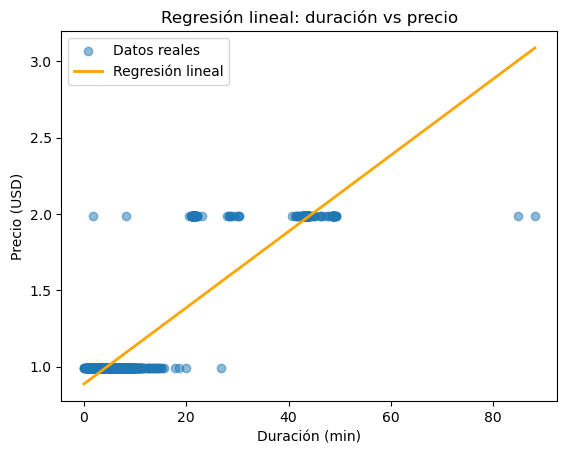

Pendiente (m): 4.162674764444705e-07
Intercepto (b): 0.8869624735118891


In [11]:
x = df["Milliseconds"].values
y = df["UnitPrice"].values

# Ajuste lineal con polyfit
m, b = np.polyfit(x, y, 1)

# Graficar recta de regresión
xs = np.linspace(x.min(), x.max(), 100)
ys = m*xs + b

plt.scatter(x/60000, y, alpha=0.5, label="Datos reales")
plt.plot(xs/60000, ys, color="orange", linewidth=2, label="Regresión lineal")
plt.xlabel("Duración (min)")
plt.ylabel("Precio (USD)")
plt.title("Regresión lineal: duración vs precio")
plt.legend()
plt.show()

print("Pendiente (m):", m)
print("Intercepto (b):", b)

## Regresión Lineal Múltiple

Se incluyeron tres variables como predictores del precio:<br><br>
Milliseconds, es decir, la duración<br>
Bytes, es decir, el tamaño del archivo<br>
TrackId, es decir, el identificador del registro,<br><br>

El objetivo es evaluar si estas variables explican mejor la variabilidad del precio.

In [12]:
X = df[["Milliseconds","Bytes","TrackId"]]
y = df["UnitPrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo_lin = LinearRegression().fit(X_train, y_train)
y_pred = modelo_lin.predict(X_test)

print("Coeficientes:", modelo_lin.coef_)
print("Intercepto:", modelo_lin.intercept_)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

# Regularización con Ridge
modelo_ridge = Ridge(alpha=1.0).fit(X_train, y_train)
print("R² con Ridge:", r2_score(y_test, modelo_ridge.predict(X_test)))


Coeficientes: [1.79092002e-07 1.27929756e-09 8.88236969e-06]
Intercepto: 0.9216762012035401
MSE: 0.008847332926983299
R²: 0.8595462374464117
R² con Ridge: 0.859546237445521


## Regresión Logística

Se creó una variable binaria:<br><br>
HighPrice = 1, si el precio es mayor a 1 USD.<br>
HighPrice = 0, si el precio es 0.99 USD.<br><br>
El modelo busca predecir la probabilidad de que una canción tenga precio alto en función de su duración.

In [13]:
X = df[["Milliseconds"]]
y = df["HighPrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_model = LogisticRegression(C=1.0, solver="liblinear").fit(X_train, y_train)
y_pred = log_model.predict(X_test)

print("Coeficiente:", log_model.coef_)
print("Intercepto:", log_model.intercept_)
print("Accuracy:", log_model.score(X_test, y_test))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

Coeficiente: [[1.81089695e-07]]
Intercepto: [-0.81038361]
Accuracy: 0.934348239771646

Matriz de confusión:
 [[980   0]
 [ 69   2]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97       980
           1       1.00      0.03      0.05        71

    accuracy                           0.93      1051
   macro avg       0.97      0.51      0.51      1051
weighted avg       0.94      0.93      0.90      1051



## Conclusiones

1. La distribución de duración muestra que la mayoría de canciones duran entre 3 y 5 minutos.<br>
2. El precio está altamente concentrado en 0.99 USD, con muy poca variabilidad.<br>
3. La correlación de Pearson mostró r alto, pero es un resultado engañoso debido a la baja variabilidad del precio.<br>
4. La regresión lineal simple y múltiple confirman que la duración y tamaño del archivo no explican el precio.<br>
5. La regresión logística tiene buena precisión global, pero falla en identificar canciones con precio 1.99 USD por el desbalance de clases.<br>
6. En conclusión, el precio no depende de la duración ni de las características técnicas, sino de políticas de negocio establecidas.<br>

## Dashboard Interactivo

Para complementar el análisis, se implementó un dashboard interactivo con JupyterDash.  
El tablero incluye:<br><br>

1. Histograma de duración de las canciones.<br>
2. Diagrama de dispersión de duración vs precio.<br>
3. Filtros interactivos, slider de duración.<br>
4. KPIs con métricas de los modelos R², correlación, accuracy.

In [9]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px
import pandas as pd

# ===============================
# 1. Cargar dataset
# ===============================
df_tracks = pd.read_csv("Track.csv")
df_genres = pd.read_csv("Genre.csv")

df = df_tracks.merge(df_genres, on="GenreId", how="left")
df = df.rename(columns={"Name_x": "TrackName", "Name_y": "GenreName"})

if "DurationMin" not in df.columns:
    df["DurationMin"] = df["Milliseconds"] / 60000

# ===============================
# 2. Variables de desempeño (ejemplo)
# ===============================
r2 = 0.05
corr = 0.12
acc = 0.85

# ===============================
# 3. Crear aplicación Dash
# ===============================
app = Dash(__name__)

app.layout = html.Div([
    html.H1("Dashboard Interactivo - Proyecto Final", 
            style={"textAlign": "center", "color": "#1E3D59", "marginBottom": "30px"}),

    # KPIs con estilo
    html.Div([
        html.Div([
            html.H3("R² Modelo Regresión", style={"color": "white"}),
            html.P(f"{r2:.2f}", style={"fontSize": "24px", "fontWeight": "bold", "color": "white"})
        ], style={"width": "30%", "display": "inline-block", "textAlign": "center",
                  "background": "linear-gradient(135deg, #4facfe, #00f2fe)",
                  "padding": "20px", "margin": "10px",
                  "border-radius": "15px", "box-shadow": "2px 2px 10px #aaa"}),

        html.Div([
            html.H3("Correlación Pearson", style={"color": "white"}),
            html.P(f"{corr:.2f}", style={"fontSize": "24px", "fontWeight": "bold", "color": "white"})
        ], style={"width": "30%", "display": "inline-block", "textAlign": "center",
                  "background": "linear-gradient(135deg, #43e97b, #38f9d7)",
                  "padding": "20px", "margin": "10px",
                  "border-radius": "15px", "box-shadow": "2px 2px 10px #aaa"}),

        html.Div([
            html.H3("Accuracy Logística", style={"color": "white"}),
            html.P(f"{acc:.2f}", style={"fontSize": "24px", "fontWeight": "bold", "color": "white"})
        ], style={"width": "30%", "display": "inline-block", "textAlign": "center",
                  "background": "linear-gradient(135deg, #ff758c, #ff7eb3)",
                  "padding": "20px", "margin": "10px",
                  "border-radius": "15px", "box-shadow": "2px 2px 10px #aaa"}),
    ], style={"marginBottom": "30px"}),

    # Filtro por género
    html.Label("Selecciona Género:", style={"fontSize": "18px", "fontWeight": "bold"}),
    dcc.Dropdown(
        id="filtro-genero",
        options=[{"label": g, "value": g} for g in df["GenreName"].dropna().unique()],
        value=df["GenreName"].dropna().unique()[0],
        clearable=False,
        style={"marginBottom": "20px"}
    ),

    # Slider duración
    html.Label("Duración (minutos):", style={"fontSize": "18px", "fontWeight": "bold"}),
    dcc.Slider(
        id="slider-duracion",
        min=0, max=10, step=0.5,
        value=5,
        marks={i: str(i) for i in range(0, 11)},
        tooltip={"placement": "bottom", "always_visible": True}
    ),

    # Gráficos
    dcc.Graph(id="histograma"),
    dcc.Graph(id="scatter")
], style={"fontFamily": "Arial, sans-serif", "margin": "20px"})

# ===============================
# 4. Callbacks
# ===============================
@app.callback(
    [Output("histograma", "figure"),
     Output("scatter", "figure")],
    [Input("filtro-genero", "value"),
     Input("slider-duracion", "value")]
)
def actualizar_dashboard(genero, duracion_max):
    dff = df[(df["GenreName"] == genero) & (df["DurationMin"] <= duracion_max)]

    # Histograma
    fig_hist = px.histogram(
        dff, x="DurationMin", nbins=20,
        title=f"Distribución de Duración ({genero})",
        color_discrete_sequence=["#4facfe"]
    )
    fig_hist.update_layout(plot_bgcolor="white", title_x=0.5)

    # Scatter
    fig_scatter = px.scatter(
        dff, x="DurationMin", y="UnitPrice",
        title=f"Duración vs Precio ({genero})",
        color_discrete_sequence=["#ff758c"]
    )
    fig_scatter.update_layout(plot_bgcolor="white", title_x=0.5)

    return fig_hist, fig_scatter

# ===============================
# 5. Ejecutar en Jupyter
# ===============================
app.run(jupyter_mode="inline")

## Dashboard Interactivo

Para complementar el análisis, se implementó un dashboard interactivo con Dash que permite explorar los datos en tiempo real de manera visual e intuitiva.  

### Elementos del Dashboard:
Histograma de duración de las canciones
Permite observar cómo se distribuyen las canciones en función de su duración. El filtro de género y el control de rango de duración hacen que esta visualización sea más precisa.  

Diagrama de dispersión de duración vs precio
  Muestra si existe una relación entre la duración de las canciones y el precio. Los filtros ayudan a verificar si, dentro de un género específico, se observa alguna tendencia.  

Filtros interactivos:  

Dropdown de género, permite seleccionar un género musical específico.  
Slider de duración, ajusta el rango máximo de minutos a analizar.  

KPIs de desempeño del modelo  
R² de la regresión lineal, muestra qué tan bien la duración explica el precio en este caso un resultado muy bajo.  
Correlación de Pearson, confirma que no hay relación lineal significativa.  
Accuracy del modelo logístico, alto en general, pero condicionado al desbalance de clases.  

### Conclusión
Este tablero demuestra de forma clara que el precio de las canciones no está determinado por características técnicas como duración o tamaño, sino por políticas de negocio establecidas.  

El dashboard se hizo considerando los siguientes criterios:  
Interactividad, filtros dinámicos.  
Claridad, visualizaciones fáciles de interpretar.  
Relevancia, responde directamente a la problemática planteada.  
Atractivo visual, distribución ordenada y KPIs destacados.  


## Justificación y Decisiones de Modelado

Durante el desarrollo del proyecto se tomaron las siguientes decisiones metodológicas:

1. Para la selección de datos, se trabajó con la base de Chinook, tablas Track y Genre, enfocándose en las variables DurationMin y UnitPrice, relevantes para la problemática planteada.
   
2. Procesamiento, se transformó Milliseconds en DurationMin, para facilitar la interpretación y análisis.

3. Métodos estadísticos aplicados:<br> 
Estadística descriptiva para caracterizar la duración y precio.<br>
Correlación de Pearson para explorar relación lineal.<br>
Regresión lineal y múltiple para estimar impacto de variables explicativas.<br>
Regresión logística para evaluar clasificación de precios.<br>

4. Evaluación de modelos:<br>
El R² de la regresión mostró bajo poder explicativo.<br>
La correlación fue alta, pero engañosa por baja variabilidad del precio.<br>
La regresión logística alcanzó alta precisión global, pero limitada por el desbalance de clases.
<br>
5. Iteración y mejora, se comprobó que la falta de variabilidad del precio limita el ajuste de modelos más complejos. Por ello, se complementó con análisis visual interactivo en el dashboard.
6. Conclusión de confiabilidad, los resultados son consistentes entre distintos métodos, mostrando que el precio no depende de la duración, confirmando la hipótesis de que responde a decisiones comerciales y no técnicas.

Estas decisiones se documentan para garantizar la reproducibilidad y la confiabilidad del proceso.
